In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2025-04-21 17:56:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2025-04-21 17:56:55 (13.5 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [145]:
# !pip install tensorflow==2.15
import tensorflow as tf
tf.__version__

'2.15.0'

In [ ]:
from helper_functions import calculate_results, unzip_data, calculate_results

In [ ]:
import pandas as pd

In [ ]:
sample_sub = pd.read_csv('sample_submission.csv', sep=',')
sample_sub.tail(20)

,test_id,is_duplicate
2345776,2345776,1
2345777,2345777,1
2345778,2345778,1
2345779,2345779,1
2345780,2345780,1
2345781,2345781,1
2345782,2345782,1
2345783,2345783,1
2345784,2345784,1
2345785,2345785,1


In [ ]:
train_data = pd.read_csv(
    'train.csv', sep=',',
)


In [ ]:
train_data.set_index('id')

,qid1,qid2,question1,question2,is_duplicate
id,,,,,
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...
404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,537928,537929,What is one coin?,What's this coin?,0


In [ ]:
test_data = pd.read_csv(
    'test.csv', sep=',',
)

<ipython-input-51-f84f5cbee38d>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv(


In [ ]:
train_data['is_duplicate'].to_numpy()

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers import Embedding
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def convert_to_string(data, question):
  train_to_list_1 = data[question].tolist()
  train_to_list_1_str = [str(x) for x in train_to_list_1]
  return train_to_list_1_str


In [ ]:
train_str_question_1 = convert_to_string(train_data, 'question1')
train_str_question_2 = convert_to_string(train_data, 'question2')
test_str_question_1 = convert_to_string(test_data, 'question1')
test_str_question_2 = convert_to_string(test_data, 'question2')

In [ ]:
train_str_question_1[:10]

['What is the step by step guide to invest in share market in india?',
 'What is the story of Kohinoor (Koh-i-Noor) Diamond?',
 'How can I increase the speed of my internet connection while using a VPN?',
 'Why am I mentally very lonely? How can I solve it?',
 'Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?',
 'Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?',
 'Should I buy tiago?',
 'How can I be a good geologist?',
 'When do you use シ instead of し?',
 'Motorola (company): Can I hack my Charter Motorolla DCX3400?']

In [ ]:
def create_a_seq_of_data(train_str_data):
  token_seq = [len(x.split()) for x in train_str_data]
  return token_seq

In [ ]:
token_seq_1 = create_a_seq_of_data(train_str_question_1)
token_seq_2 = create_a_seq_of_data(train_str_question_2)

(array([3.11842e+05, 8.25070e+04, 9.07300e+03, 6.82000e+02, 1.60000e+02,
        2.30000e+01, 2.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  1. ,  13.4,  25.8,  38.2,  50.6,  63. ,  75.4,  87.8, 100.2,
        112.6, 125. ]),
 <BarContainer object of 10 artists>)

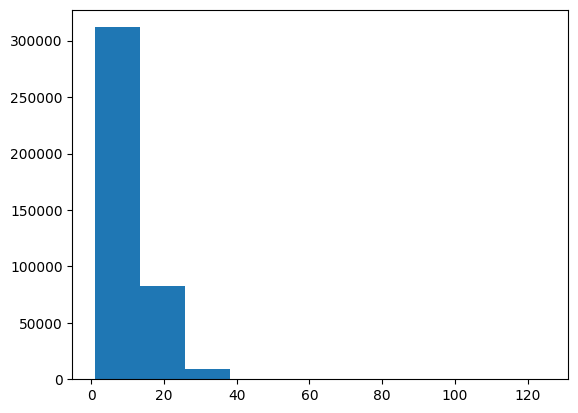

In [ ]:

plt.hist(token_seq_1)

(array([3.86788e+05, 1.66370e+04, 8.09000e+02, 2.50000e+01, 1.00000e+01,
        4.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.60000e+01]),
 array([  1. ,  24.6,  48.2,  71.8,  95.4, 119. , 142.6, 166.2, 189.8,
        213.4, 237. ]),
 <BarContainer object of 10 artists>)

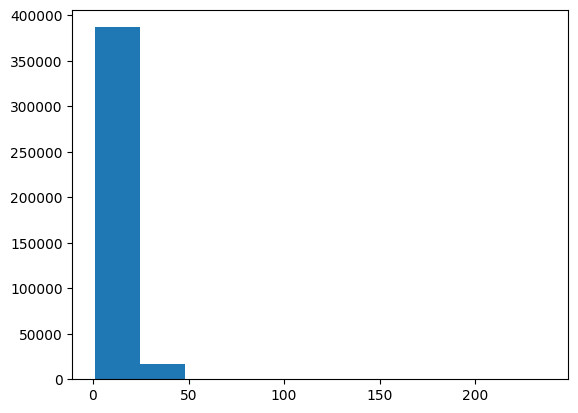

In [ ]:
plt.hist(token_seq_2)

In [ ]:
train_data['combined'] = train_data['question1'] + ' ' + train_data['question2']

In [ ]:
test_data['combined'] = test_data['question1'] + ' ' + test_data['question2']

In [ ]:
test_data_concat_str = convert_to_string(test_data, 'combined')
test_data_concat_str[:5]

['How does the Surface Pro himself 4 compare with iPad Pro? Why did Microsoft choose core m3 and not core i3 home Surface Pro 4?',
 'Should I have a hair transplant at age 24? How much would it cost? How much cost does hair transplant require?',
 'What but is the best way to send money from China to the US? What you send money to China?',
 'Which food not emulsifiers? What foods fibre?',
 'How "aberystwyth" start reading? How their can I start reading?']

In [ ]:
train_data_concat_str = convert_to_string(train_data, 'combined')
train_data_concat_str[:10]

['What is the step by step guide to invest in share market in india? What is the step by step guide to invest in share market?',
 'What is the story of Kohinoor (Koh-i-Noor) Diamond? What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?',
 'How can I increase the speed of my internet connection while using a VPN? How can Internet speed be increased by hacking through DNS?',
 'Why am I mentally very lonely? How can I solve it? Find the remainder when [math]23^{24}[/math] is divided by 24,23?',
 'Which one dissolve in water quikly sugar, salt, methane and carbon di oxide? Which fish would survive in salt water?',
 "Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me? I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?",
 'Should I buy tiago? What keeps childern active and far from phone and video games?',
 'How can I be a good geologist? What should I do to be a great geologist?',


,test_id,question1,question2,combined
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...,How does the Surface Pro himself 4 compare wit...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?,Should I have a hair transplant at age 24? How...


In [ ]:
token_seq_combine = create_a_seq_of_data(train_data_concat_str)
token_seq_combine[:10]

[26, 21, 24, 20, 20, 32, 15, 16, 16, 18]

(array([3.1494e+05, 8.4517e+04, 4.3630e+03, 4.2000e+02, 2.4000e+01,
        9.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.6000e+01]),
 array([  1. ,  27.9,  54.8,  81.7, 108.6, 135.5, 162.4, 189.3, 216.2,
        243.1, 270. ]),
 <BarContainer object of 10 artists>)

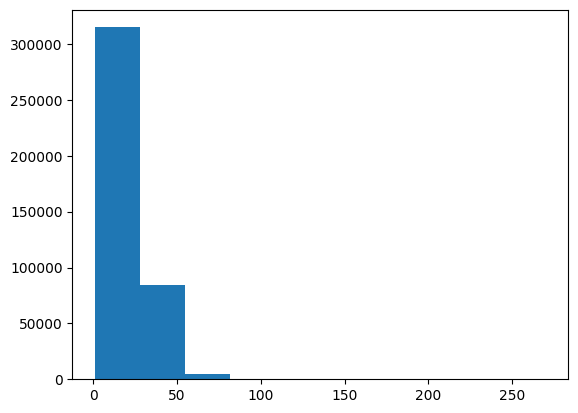

In [ ]:
plt.hist(token_seq_combine)

In [ ]:
sequence_token_combine = int(np.percentile(token_seq_combine, 95))
sequence_token_combine

41

In [ ]:
sequence_token_1 = int(np.percentile(token_seq_1, 95))
sequence_token_1

22

In [ ]:
sequence_token_2 = int(np.percentile(token_seq_2, 95))
sequence_token_2

24

In [ ]:
c = 'ddd ddd ddd dd'
c.split()

['ddd', 'ddd', 'ddd', 'dd']

In [ ]:
max_tokens = 120000
text_vectorizer = TextVectorization(
    max_tokens=max_tokens,
    output_mode='int',
    output_sequence_length=sequence_token_combine,
)

In [ ]:
text_vectorizer.adapt(train_data_concat_str)

In [ ]:
real_max_tokens = len(text_vectorizer.get_vocabulary())
real_max_tokens

111680

In [ ]:
embedding = Embedding(
    input_dim=real_max_tokens,
    output_dim=128,
    embeddings_initializer='uniform',
)

In [ ]:
import random
random_sentence = random.choice(train_data_concat_str)
random_sentence

'Is it true that eating rice can make you sleepy in awhile? Does rice make one feel sleepy or drowsy?'

In [ ]:
embedding(text_vectorizer([random_sentence]))

<tf.Tensor: shape=(1, 41, 128), dtype=float32, numpy=
array([[[ 0.03006432,  0.04573225, -0.00717723, ..., -0.02029855,
          0.00824329, -0.0017181 ],
        [ 0.03736654, -0.0218214 , -0.03592129, ..., -0.00632115,
         -0.01758611,  0.0244524 ],
        [ 0.03765068, -0.032478  ,  0.02100969, ..., -0.03544391,
         -0.02297187, -0.0282673 ],
        ...,
        [-0.03644028,  0.02254352,  0.02609906, ..., -0.00158096,
         -0.01552035, -0.01453888],
        [-0.03644028,  0.02254352,  0.02609906, ..., -0.00158096,
         -0.01552035, -0.01453888],
        [-0.03644028,  0.02254352,  0.02609906, ..., -0.00158096,
         -0.01552035, -0.01453888]]], dtype=float32)>

In [ ]:
train_label = train_data['is_duplicate'].to_numpy()
train_label[:10]

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [ ]:
#from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
#one_hot_encoder = OneHotEncoder()

In [ ]:
#one_hot_encoder.fit_transform()

In [ ]:
train_data_concat_str[:10]

['What is the step by step guide to invest in share market in india? What is the step by step guide to invest in share market?',
 'What is the story of Kohinoor (Koh-i-Noor) Diamond? What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?',
 'How can I increase the speed of my internet connection while using a VPN? How can Internet speed be increased by hacking through DNS?',
 'Why am I mentally very lonely? How can I solve it? Find the remainder when [math]23^{24}[/math] is divided by 24,23?',
 'Which one dissolve in water quikly sugar, salt, methane and carbon di oxide? Which fish would survive in salt water?',
 "Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me? I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?",
 'Should I buy tiago? What keeps childern active and far from phone and video games?',
 'How can I be a good geologist? What should I do to be a great geologist?',


In [ ]:
train_label[:10]

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    train_data_concat_str,
    train_label,
    test_size=0.2,
    random_state=42
)

In [ ]:
model_0 = Pipeline([
    ('tf-idf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

model_0.fit(
    X_train ,y_train
)



Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0.score(
    X_val ,y_val
)

0.739110539464246

In [ ]:
baseline_preds = model_0.predict(X_val)
baseline_preds[:10]

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [ ]:
baseline_results = calculate_results(
    y_true=y_val,
    y_pred=baseline_preds
)
baseline_results

{'accuracy': 73.9110539464246,
 'precision': 0.742308745859842,
 'recall': 0.739110539464246,
 'f1': 0.719135061008789}

In [ ]:
import tensorflow as tf

In [ ]:
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = tf.keras.layers.Conv1D(filters=64, kernel_size=5, padding='same', activation='relu')(x)
print(x.shape)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
print(x.shape)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs)


(None, 41, 128)
(None, 41, 64)
(None, 64)


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
model_1.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:

model_1.fit(
    train_dataset,
    validation_data=val_dataset,
    steps_per_epoch=int(0.05 * len(train_dataset)),
    validation_steps=int(0.05 * len(val_dataset)),
    epochs=3,
)

Epoch 1/3
505/505 [==============================] - 177s 348ms/step - loss: 0.5758 - accuracy: 0.7011 - val_loss: 0.5482 - val_accuracy: 0.7279
Epoch 2/3
505/505 [==============================] - 173s 342ms/step - loss: 0.5500 - accuracy: 0.7254 - val_loss: 0.5327 - val_accuracy: 0.7413
Epoch 3/3
505/505 [==============================] - 200s 395ms/step - loss: 0.5341 - accuracy: 0.7338 - val_loss: 0.5302 - val_accuracy: 0.7369


In [ ]:
model_1.evaluate(val_dataset)

2527/2527 [==============================] - 11s 4ms/step - loss: 0.5294 - accuracy: 0.7379


[0.5294492244720459, 0.7378985285758972]

In [ ]:
model_1_preds = model_1.predict(val_dataset)
model_1_preds[:10]

2527/2527 [==============================] - 11s 4ms/step


array([[0.40628973],
       [0.393991  ],
       [0.16378844],
       [0.8719375 ],
       [0.8091007 ],
       [0.8643919 ],
       [0.09368014],
       [0.51130116],
       [0.46777773],
       [0.8417874 ]], dtype=float32)

In [ ]:
model_1_preds = tf.squeeze(tf.round(model_1_preds))
model_1_preds = model_1_preds.numpy()

In [ ]:
len(model_1_preds), len(y_val)

(80858, 80858)

In [ ]:
model_1_results = calculate_results(
    y_true=y_val,
    y_pred=model_1_preds
)
model_1_results

{'accuracy': 73.78985381780406,
 'precision': 0.7337753284402266,
 'recall': 0.7378985381780405,
 'f1': 0.7254718044365442}

In [ ]:
import tensorflow_hub as hub
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
tf_hub_sentence_encoder = hub.KerasLayer(
    'https://tfhub.dev/google/universal-sentence-encoder/4',
    trainable=False,
)

In [ ]:
inputs = tf.keras.layers.Input(shape=[], dtype=tf.string)
tf_embedding = tf_hub_sentence_encoder(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(tf_embedding)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs)

In [ ]:
model_2.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)


In [ ]:

model_2.fit(
    train_dataset,
    validation_data=val_dataset,
    steps_per_epoch=int(0.05 * len(train_dataset)),
    validation_steps=int(0.05 * len(val_dataset)),
    epochs=3,
)

Epoch 1/3
505/505 [==============================] - 12s 16ms/step - loss: 0.5754 - accuracy: 0.6979 - val_loss: 0.5377 - val_accuracy: 0.7269
Epoch 2/3
505/505 [==============================] - 7s 14ms/step - loss: 0.5409 - accuracy: 0.7259 - val_loss: 0.5215 - val_accuracy: 0.7411
Epoch 3/3
505/505 [==============================] - 10s 20ms/step - loss: 0.5273 - accuracy: 0.7317 - val_loss: 0.5131 - val_accuracy: 0.7329


In [ ]:
model_2.evaluate(val_dataset)


2527/2527 [==============================] - 37s 14ms/step - loss: 0.5206 - accuracy: 0.7351


[0.520582914352417, 0.7350911498069763]

In [ ]:

model_2_preds = model_2.predict(val_dataset)
model_2_preds[:10]


2527/2527 [==============================] - 27s 11ms/step


array([[0.49067622],
       [0.3864301 ],
       [0.10119175],
       [0.85229063],
       [0.62415874],
       [0.6938341 ],
       [0.26348042],
       [0.71723735],
       [0.22346832],
       [0.8525301 ]], dtype=float32)

In [ ]:
model_2_preds = tf.squeeze(tf.round(model_2_preds))
model_2_preds = model_2_preds.numpy()

In [ ]:
model_2_results = calculate_results(
    y_true=y_val,
    y_pred=model_2_preds
)
model_2_results

{'accuracy': 73.50911474436667,
 'precision': 0.729893505798788,
 'recall': 0.7350911474436667,
 'f1': 0.7304042698700535}

In [ ]:
# Model 3: char embedding layer

In [ ]:
def split_char(sentence):
  return " ".join(sentence)

In [ ]:
X_val[:2]

['How do I play Pokémon GO in Korea? How do I play Pokémon GO in China?',
 'What are some of the best side dishes for crab cakes? What are some good side dishes for buffalo chicken?']

In [ ]:
X_train[:2]

['What are some of the short stories? What are some great short stories with a twist ending?',
 'Is this a German Shepherd dog? Are german shepherd dogs loyal?']

In [ ]:
chars_lens = [len(x) for x in X_train]
chars_lens[:10]

[90, 62, 155, 172, 71, 123, 96, 84, 72, 98]

In [ ]:
train_chars = [split_char(x) for x in X_train]
val_chars = [split_char(x) for x in X_val]

In [ ]:
train_chars[:10]

['W h a t   a r e   s o m e   o f   t h e   s h o r t   s t o r i e s ?   W h a t   a r e   s o m e   g r e a t   s h o r t   s t o r i e s   w i t h   a   t w i s t   e n d i n g ?',
 'I s   t h i s   a   G e r m a n   S h e p h e r d   d o g ?   A r e   g e r m a n   s h e p h e r d   d o g s   l o y a l ?',
 'W h a t   i s   t h e   m o s t   i m p o r t a n t   l e s s o n   e v e r   l e a r n e d   i n   y o u r   l i f e ?   W h a t   a r e   t h e   m o s t   i m p o r t a n t   l e s s o n s   y o u   h a v e   l e a r n e d   i n   y o u r   l i f e   a n d   w h e n   d i d   y o u   l e a r n   t h e m ?',
 'W h i c h   a d   n e t w o r k s   f o r   m o b i l e   n a t i v e   a d s   h a v e   a   g o o d   f i l l   r a t e / e C P M   b a l a n c e   i n   E u r o p e ?   W h i c h   a d   n e t w o r k s   f o r   d e s k t o p   n a t i v e   a d s   h a v e   a   g o o d   f i l l   r a t e / e C P M   b a l a n c e   i n   E u r o p e ?',
 'W h a t   s h o u l d   

(array([2.26141e+05, 9.03570e+04, 6.38300e+03, 5.00000e+02, 2.40000e+01,
        9.00000e+00, 4.00000e+00, 1.00000e+00, 0.00000e+00, 1.30000e+01]),
 array([   3. ,  134.6,  266.2,  397.8,  529.4,  661. ,  792.6,  924.2,
        1055.8, 1187.4, 1319. ]),
 <BarContainer object of 10 artists>)

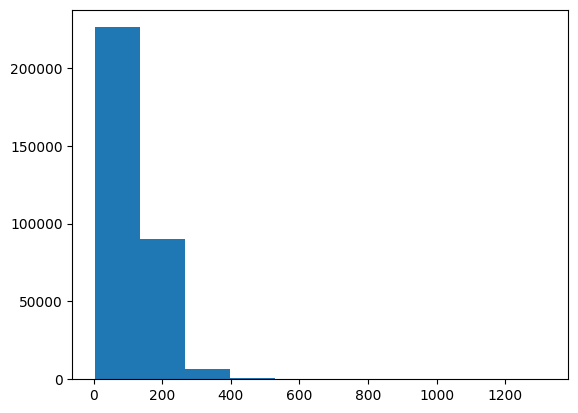

In [ ]:
plt.hist(chars_lens)

In [ ]:
output_seq_char_len = int(np.percentile(chars_lens, 95))
output_seq_char_len

227

In [ ]:
import string
alphabet = string.ascii_lowercase + string.punctuation + string.digits
NUM_CHAR_TOKENS = len(alphabet) + 2 # space and OOV
NUM_CHAR_TOKENS

70

In [ ]:
char_vectorizer = TextVectorization(
    max_tokens=NUM_CHAR_TOKENS,
    output_mode='int',
    output_sequence_length=output_seq_char_len
)

In [ ]:
char_vectorizer.adapt(train_chars)

In [ ]:
char_embed = Embedding(
    input_dim=NUM_CHAR_TOKENS,
    output_dim=28,
    embeddings_initializer='uniform',
)

In [ ]:
char_embed(char_vectorizer([random_sentence]))

<tf.Tensor: shape=(1, 227, 28), dtype=float32, numpy=
array([[[-0.04200749, -0.03086659, -0.0339167 , ...,  0.04354031,
          0.03555534, -0.04529337],
        [-0.04200749, -0.03086659, -0.0339167 , ...,  0.04354031,
          0.03555534, -0.04529337],
        [-0.04200749, -0.03086659, -0.0339167 , ...,  0.04354031,
          0.03555534, -0.04529337],
        ...,
        [ 0.01984941,  0.01708489, -0.013459  , ...,  0.01646432,
          0.04276094,  0.00974859],
        [ 0.01984941,  0.01708489, -0.013459  , ...,  0.01646432,
          0.04276094,  0.00974859],
        [ 0.01984941,  0.01708489, -0.013459  , ...,  0.01646432,
          0.04276094,  0.00974859]]], dtype=float32)>

In [ ]:
print(f'Charified text: \n {random_sentence}')
print(f'\nLength of random_train_chars: {len(random_sentence.split())}')
vectorized_chars = char_vectorizer([random_sentence])
print(f'\nVectorized chars: \n {vectorized_chars}')
print(f'\nLength of vectorized chars: {len(vectorized_chars[0])}')

Charified text: 
 Is it true that eating rice can make you sleepy in awhile? Does rice make one feel sleepy or drowsy?

Length of random_train_chars: 20

Vectorized chars: 
 [[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0]]

Length of vectorized chars: 227


In [ ]:
print(f'Charified text: \n {random_sentence}')
char_embed_example = char_embed(char_vectorizer([random_sentence]))
print(f'Embeded chars (after vectorization and embedding): \n {char_embed_example}')
print(f'Character embeddings shape: {char_embed_example.shape}')

Charified text: 
 Is it true that eating rice can make you sleepy in awhile? Does rice make one feel sleepy or drowsy?
Embeded chars (after vectorization and embedding): 
 [[[-0.04200749 -0.03086659 -0.0339167  ...  0.04354031  0.03555534
   -0.04529337]
  [-0.04200749 -0.03086659 -0.0339167  ...  0.04354031  0.03555534
   -0.04529337]
  [-0.04200749 -0.03086659 -0.0339167  ...  0.04354031  0.03555534
   -0.04529337]
  ...
  [ 0.01984941  0.01708489 -0.013459   ...  0.01646432  0.04276094
    0.00974859]
  [ 0.01984941  0.01708489 -0.013459   ...  0.01646432  0.04276094
    0.00974859]
  [ 0.01984941  0.01708489 -0.013459   ...  0.01646432  0.04276094
    0.00974859]]]
Character embeddings shape: (1, 227, 28)


In [ ]:
inputs = tf.keras.layers.Input(shape=(1, ), dtype=tf.string)
x = char_vectorizer(inputs)
x = char_embed(x)
x = tf.keras.layers.Conv1D(filters=64, kernel_size=5 ,padding='same')(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
print(x.shape)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs)

(None, 64)


In [ ]:
model_3.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)


In [ ]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, y_train)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, y_val)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:

model_3.fit(
    train_char_dataset,
    validation_data=val_dataset,
    steps_per_epoch=int(0.05 * len(train_char_dataset)),
    validation_steps=int(0.05 * len(val_char_dataset)),
    epochs=3,
)

Epoch 1/3
505/505 [==============================] - 10s 17ms/step - loss: 0.6384 - accuracy: 0.6260 - val_loss: 0.7323 - val_accuracy: 0.4053
Epoch 2/3
505/505 [==============================] - 8s 16ms/step - loss: 0.6327 - accuracy: 0.6349 - val_loss: 0.6388 - val_accuracy: 0.6255
Epoch 3/3
505/505 [==============================] - 10s 19ms/step - loss: 0.6259 - accuracy: 0.6408 - val_loss: 0.6398 - val_accuracy: 0.6255


In [ ]:
model_3.evaluate(val_char_dataset)


2527/2527 [==============================] - 16s 6ms/step - loss: 0.6305 - accuracy: 0.6378


[0.6305103898048401, 0.6377971172332764]

In [ ]:
model_3_preds = model_3.predict(val_char_dataset)
model_3_preds[:10]

2527/2527 [==============================] - 16s 6ms/step


array([[0.55734223],
       [0.3425577 ],
       [0.31603712],
       [0.3847054 ],
       [0.510489  ],
       [0.4981094 ],
       [0.48052198],
       [0.48663434],
       [0.53879184],
       [0.38918597]], dtype=float32)

In [ ]:

model_3_preds = tf.squeeze(tf.round(model_3_preds))
model_3_preds = model_3_preds.numpy()


In [ ]:

model_3_results = calculate_results(
    y_true=y_val,
    y_pred=model_3_preds
)
model_3_results

{'accuracy': 63.77971258255213,
 'precision': 0.6252790412388671,
 'recall': 0.6377971258255213,
 'f1': 0.6282130633484877}

In [ ]:
# Model 4: Token + Char embedding

# token model
token_inputs = tf.keras.layers.Input(shape=[], dtype=tf.string)
token_embeddings = tf_hub_sentence_encoder(token_inputs)
token_output = tf.keras.layers.Dense(128, activation='relu')(token_embeddings)
token_model = tf.keras.Model(token_inputs, token_output)

# char model
char_inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(char_inputs, char_bi_lstm)


# Concatanate
token_char_concat = tf.keras.layers.Concatenate()([token_model.output, char_model.output])
combined_dropout = tf.keras.layers.Dropout(0.5)(token_char_concat)
combined_dense = tf.keras.layers.Dense(128, activation='relu')(combined_dropout)
final_dropout = tf.keras.layers.Dropout(0.5)(combined_dense)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(final_dropout)
model_4 = tf.keras.Model(inputs=[token_model.input,
                                 char_model.input] , outputs=output_layer)



In [ ]:
model_4.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 input_11 (InputLayer)       [(None,)]                    0         []                            
                                                                                                  
 text_vectorization_1 (Text  (None, 227)                  0         ['input_12[0][0]']            
 Vectorization)                                                                                   
                                                                                                  
 keras_layer (KerasLayer)    (None, 512)                  2567978   ['input_11[0][0]']     

In [ ]:
train_char_token_dataset = tf.data.Dataset.from_tensor_slices((X_train, train_chars))
train_char_token_labels = tf.data.Dataset.from_tensor_slices((y_train))
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_dataset, train_char_token_labels))
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_char_token_dataset = tf.data.Dataset.from_tensor_slices((X_val, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices((y_val))
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_dataset, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
model_4.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)


In [ ]:
model_4.fit(
    train_char_token_dataset,
    validation_data=val_char_token_dataset,
    steps_per_epoch=int(0.05 * len(train_char_token_dataset)),
    validation_steps=int(0.05 * len(val_char_token_dataset)),
    epochs=3,
)

Epoch 1/3
505/505 [==============================] - 89s 164ms/step - loss: 0.5892 - accuracy: 0.6852 - val_loss: 0.5363 - val_accuracy: 0.7250
Epoch 2/3
505/505 [==============================] - 87s 172ms/step - loss: 0.5539 - accuracy: 0.7153 - val_loss: 0.5214 - val_accuracy: 0.7406
Epoch 3/3
505/505 [==============================] - 83s 165ms/step - loss: 0.5396 - accuracy: 0.7250 - val_loss: 0.5132 - val_accuracy: 0.7351


In [ ]:
model_4.evaluate(val_char_token_dataset)


2527/2527 [==============================] - 106s 42ms/step - loss: 0.5202 - accuracy: 0.7349


[0.5202352404594421, 0.7348685264587402]

In [ ]:
model_4_preds = model_4.predict(val_char_token_dataset)
model_4_preds[:10]


2527/2527 [==============================] - 114s 42ms/step


array([[0.5312798 ],
       [0.39400655],
       [0.11521015],
       [0.80799234],
       [0.6366747 ],
       [0.6011398 ],
       [0.2444343 ],
       [0.7076511 ],
       [0.2477773 ],
       [0.8030796 ]], dtype=float32)

In [ ]:
model_4_preds = tf.squeeze(tf.round(model_4_preds))
model_4_preds = model_4_preds.numpy()

In [ ]:
model_4_results = calculate_results(
    y_true=y_val,
    y_pred=model_4_preds
)
model_4_results

{'accuracy': 73.48685349625269,
 'precision': 0.7307657370439656,
 'recall': 0.7348685349625269,
 'f1': 0.731841774483755}

In [146]:
all_model_results = pd.DataFrame({"model_0_baseline": baseline_results,
                                  "model_1_custom_token_embedding": model_1_results,
                                  "model_2_pretrained_token_embedding": model_2_results,
                                  "model_3_custom_char_embedding": model_3_results,
                                  "model_4_hybrid_char_token_embedding": model_4_results})

In [147]:
all_model_results = all_model_results.T

In [148]:
all_model_results['accuracy'] = all_model_results['accuracy'] / 100

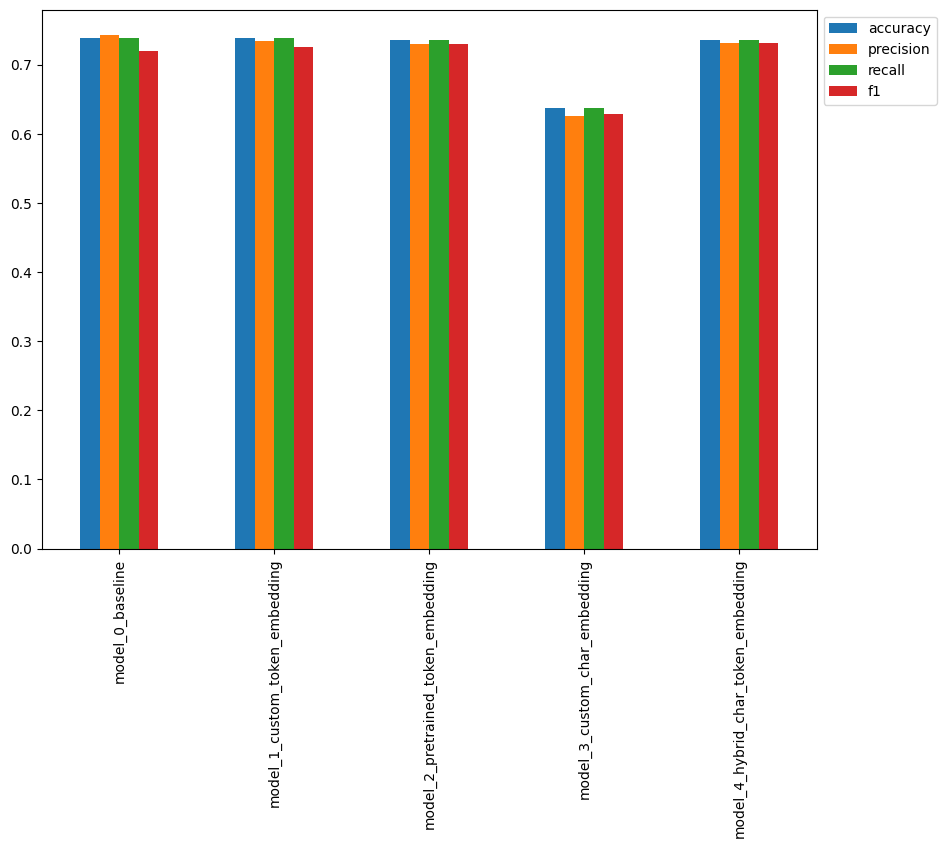

In [152]:
all_model_results.plot(kind='bar', figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0))

<Axes: >

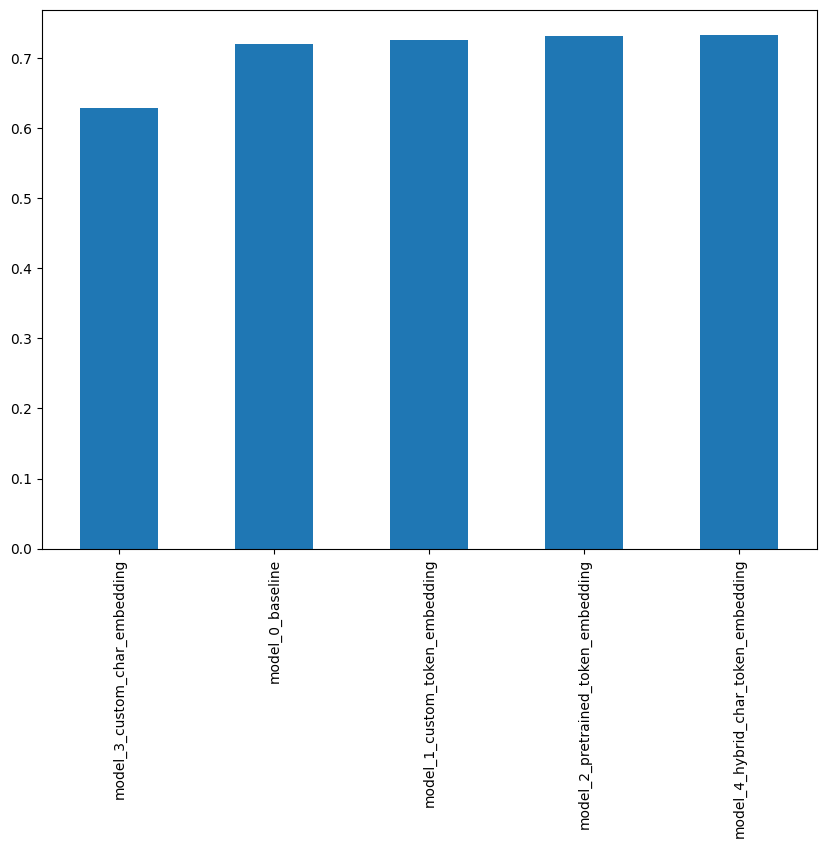

In [153]:
all_model_results.sort_values(by='f1')['f1'].plot(kind='bar', figsize=(10, 7))